In [176]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine learning libraries
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,cross_validate,StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,ExtraTreesClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [177]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [178]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [179]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [180]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [181]:
train_df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [182]:
train_df.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [183]:
train_df.groupby('Sex').Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [184]:
train_df.groupby('Embarked').Survived.mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [185]:
train_df.groupby('SibSp').Survived.mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [186]:
train_df.groupby('Parch').Survived.mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [187]:
train_df['Family_size'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Family_size'] = test_df['SibSp'] + test_df['Parch'] + 1

In [188]:
train_df.groupby('Family_size').Survived.mean().sort_values(ascending=False)

Family_size
4     0.724138
3     0.578431
2     0.552795
7     0.333333
1     0.303538
5     0.200000
6     0.136364
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [189]:
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
train_df['Family_size_grouped'] = train_df['Family_size'].map(family_map)
test_df['Family_size_grouped'] = test_df['Family_size'].map(family_map)

train_df.groupby('Family_size_grouped').Survived.mean().sort_values(ascending=False)

Family_size_grouped
Small     0.578767
Alone     0.303538
Medium    0.162162
Large     0.160000
Name: Survived, dtype: float64

In [190]:
train_df.groupby('Embarked').Survived.mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

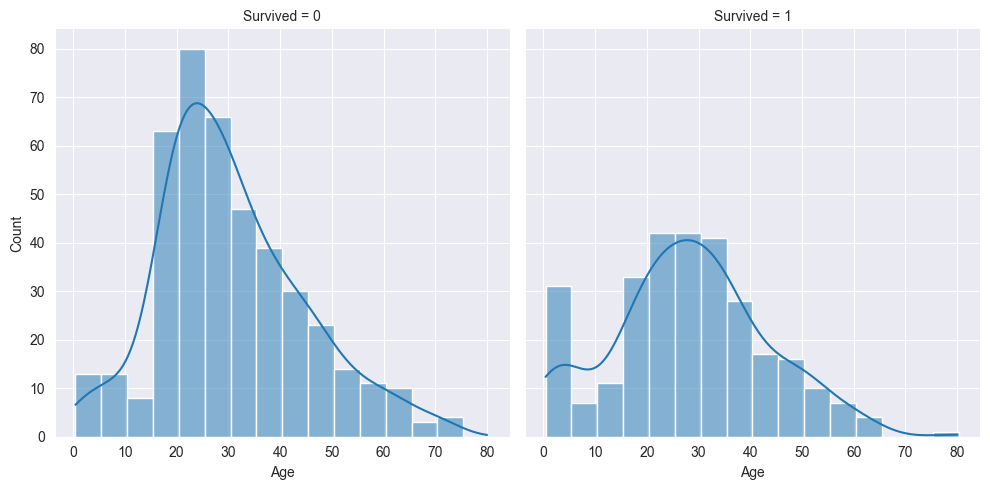

In [191]:
sns.displot(train_df,x='Age', col='Survived', binwidth=5, kde=True)
plt.show()

In [192]:
train_df['Age_Cut'] = pd.cut(train_df['Age'],bins = [0,10,20,30,40,50,60,70,80],labels=['Baby','Teen','20s','30s','40s','50s','60s','70s'])
test_df['Age_Cut'] = pd.cut(test_df['Age'],bins = [0,10,20,30,40,50,60,70,80],labels=['Baby','Teen','20s','30s','40s','50s','60s','70s'])

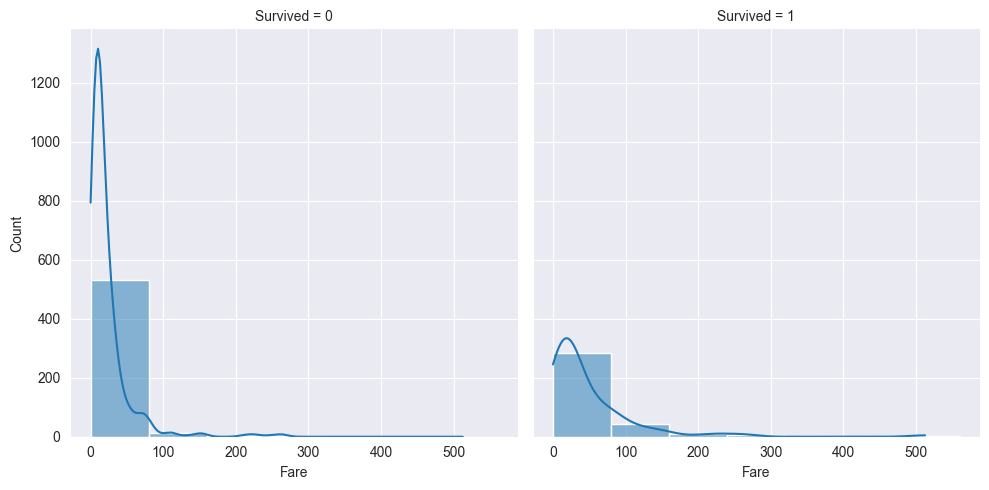

In [193]:
sns.displot(train_df, x = 'Fare', col = 'Survived', binwidth=80, kde=True)
plt.show()

In [194]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [195]:
train_df['Fare_Cut'] = pd.qcut(train_df['Fare'].sort_values(ascending=False),5,labels=['Vary_Low','Low','Medium','High','Very_High'])
test_df['Fare_Cut'] = pd.qcut(test_df['Fare'].sort_values(ascending=False),5,labels=['Vary_Low','Low','Medium','High','Very_High'])



In [196]:
train_df.groupby('Fare_Cut').Survived.mean().sort_values(ascending=False)

Fare_Cut
Very_High    0.642045
High         0.444444
Medium       0.424419
Vary_Low     0.217877
Low          0.201087
Name: Survived, dtype: float64

In [197]:
train_df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [198]:
train_df['Title'] = train_df['Name'].str.extract('([A-Za-z]+)\.')
test_df['Title'] = test_df['Name'].str.extract('([A-Za-z]+)\.')

In [199]:
rename_title = {"Mr":'Honorific', "Mrs":'Honorific', "Miss":'Honorific', "Master":'Honorific', "Don":'Honorific', "Rev":'Religious', "Dr":'Medical', "Mme":'Honorific', "Ms":'Honorific', "Major":'Military', "Lady":'Royalty', "Sir":'Honorific', "Mlle":'Honorific', "Col":'Military', "Capt":'Military', "Countess":'Royalty', "Jonkheer":'Royalty'}
train_df['Title_Cut'] = train_df['Title'].map(rename_title)
test_df['Title_Cut'] = test_df['Title'].map(rename_title)

train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Family_size_grouped,Age_Cut,Fare_Cut,Title,Title_Cut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,20s,Vary_Low,Mr,Honorific
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Small,30s,Very_High,Mrs,Honorific
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,20s,Low,Miss,Honorific
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Small,30s,Very_High,Mrs,Honorific
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Alone,30s,Low,Mr,Honorific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,Alone,20s,Medium,Rev,Religious
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,Alone,Teen,High,Miss,Honorific
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4,Small,NaN,High,Miss,Honorific
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,Alone,20s,High,Mr,Honorific


In [200]:
train_df.groupby('Title_Cut').Survived.mean().sort_values(ascending=False)

Title_Cut
Royalty      0.666667
Medical      0.428571
Military     0.400000
Honorific    0.385057
Religious    0.000000
Name: Survived, dtype: float64

In [201]:
train_df['Name_Length'] = train_df['Name'].apply(lambda x: len(x))
test_df['Name_Length'] = test_df['Name'].apply(lambda x: len(x))

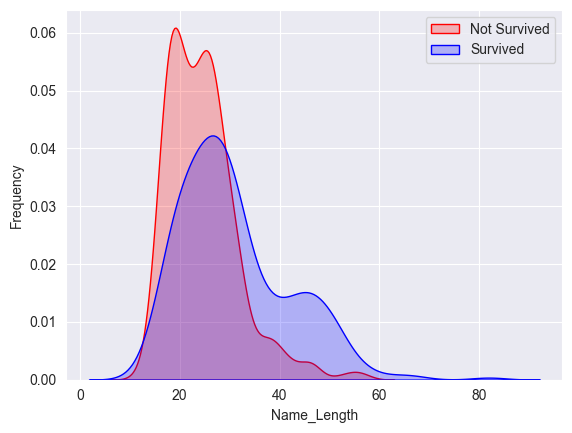

In [202]:
g = sns.kdeplot(train_df['Name_Length'][(train_df['Survived'] == 0) & (train_df['Name_Length'].notnull())], color = 'Red', shade = True)
g = sns.kdeplot(train_df['Name_Length'][(train_df['Survived'] == 1) & (train_df['Name_Length'].notnull())], color = 'Blue', shade = True)
g.set_xlabel('Name_Length')
g.set_ylabel('Frequency')
g = g.legend(['Not Survived', 'Survived'])
plt.show()


In [203]:
train_df['Name_Lengthgb'] = pd.qcut(train_df['Name_Length'], 3,labels=['Short','Medium','Long'])
test_df['Name_Lengthgb'] = pd.qcut(test_df['Name_Length'], 3,labels=['Short','Medium','Long'])

train_df.groupby('Name_Lengthgb').Survived.mean().sort_values(ascending=False)



Name_Lengthgb
Long      0.587629
Medium    0.322581
Short     0.252336
Name: Survived, dtype: float64

In [204]:
train_df['Ticket_Number'] =  train_df['Ticket'].apply(lambda x: pd.Series({'Ticket_Number': x.split()[-1]}))
test_df['Ticket_Number'] =  test_df['Ticket'].apply(lambda x: pd.Series({'Ticket_Number': x.split()[-1]}))



In [205]:
train_df.groupby('Ticket_Number').Survived.agg(['count','mean']).sort_values(by='count',ascending=False)

,count,mean
Ticket_Number,,
347082,7,0.000000
2343,7,0.000000
1601,7,0.714286
2144,6,0.000000
347088,6,0.000000
...,...,...
2662,1,0.000000
2663,1,1.000000
2664,1,0.000000


In [206]:
train_df['TicketNumberCounts'] = train_df.groupby('Ticket_Number')['Ticket_Number'].transform('count')
test_df['TicketNumberCounts'] = test_df.groupby('Ticket_Number')['Ticket_Number'].transform('count')

In [207]:
train_df['TicketShare'] = train_df['TicketNumberCounts'].apply(lambda x: 'Share' if x > 1 else 'Not Share')
test_df['TicketShare'] = test_df['TicketNumberCounts'].apply(lambda x: 'Share' if x > 1 else 'Not Share')
train_df.groupby('TicketShare').Survived.mean().sort_values(ascending=False)

TicketShare
Share        0.521614
Not Share    0.295956
Name: Survived, dtype: float64

In [208]:
train_df['Cabin'] = train_df['Cabin'].fillna('U')
test_df['Cabin'] = test_df['Cabin'].fillna('U')

In [209]:
train_df['Cabin'] = train_df['Cabin'].apply(lambda x: x[0])
test_df['Cabin'] = test_df['Cabin'].apply(lambda x: x[0])

train_df.groupby('Cabin').Survived.mean().sort_values(ascending=False)

Cabin
D    0.757576
E    0.750000
B    0.744681
F    0.615385
C    0.593220
G    0.500000
A    0.466667
U    0.299854
T    0.000000
Name: Survived, dtype: float64

In [210]:
train_df['CabinAssigned'] = np.where(train_df['Cabin'] == 'U', 0, 1)
test_df['CabinAssigned'] = np.where(test_df['Cabin'] == 'U', 0, 1)

train_df.groupby('CabinAssigned').Survived.mean().sort_values(ascending=False)

CabinAssigned
1    0.666667
0    0.299854
Name: Survived, dtype: float64

In [211]:
train_df.shape

(891, 24)

In [212]:
test_df.shape

(418, 23)

In [213]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   PassengerId          891 non-null    int64   
 1   Survived             891 non-null    int64   
 2   Pclass               891 non-null    int64   
 3   Name                 891 non-null    object  
 4   Sex                  891 non-null    object  
 5   Age                  714 non-null    float64 
 6   SibSp                891 non-null    int64   
 7   Parch                891 non-null    int64   
 8   Ticket               891 non-null    object  
 9   Fare                 891 non-null    float64 
 10  Cabin                891 non-null    object  
 11  Embarked             889 non-null    object  
 12  Family_size          891 non-null    int64   
 13  Family_size_grouped  891 non-null    object  
 14  Age_Cut              714 non-null    category
 15  Fare_Cut             89

In [214]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   PassengerId          418 non-null    int64   
 1   Pclass               418 non-null    int64   
 2   Name                 418 non-null    object  
 3   Sex                  418 non-null    object  
 4   Age                  332 non-null    float64 
 5   SibSp                418 non-null    int64   
 6   Parch                418 non-null    int64   
 7   Ticket               418 non-null    object  
 8   Fare                 417 non-null    float64 
 9   Cabin                418 non-null    object  
 10  Embarked             418 non-null    object  
 11  Family_size          418 non-null    int64   
 12  Family_size_grouped  418 non-null    object  
 13  Age_Cut              332 non-null    category
 14  Fare_Cut             417 non-null    category
 15  Title                41

In [215]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_size',
       'Family_size_grouped', 'Age_Cut', 'Fare_Cut', 'Title', 'Title_Cut',
       'Name_Length', 'Name_Lengthgb', 'Ticket_Number', 'TicketNumberCounts',
       'TicketShare', 'CabinAssigned'],
      dtype='object')

In [216]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

In [217]:
ohe = OneHotEncoder(sparse_output=False)
ode = OrdinalEncoder()
SI = SimpleImputer(strategy='most_frequent')



In [218]:
ode_cols = ['Family_size_grouped','Name_Lengthgb','Title_Cut']
ohe_cols = ['Sex', 'Embarked']

<Axes: >

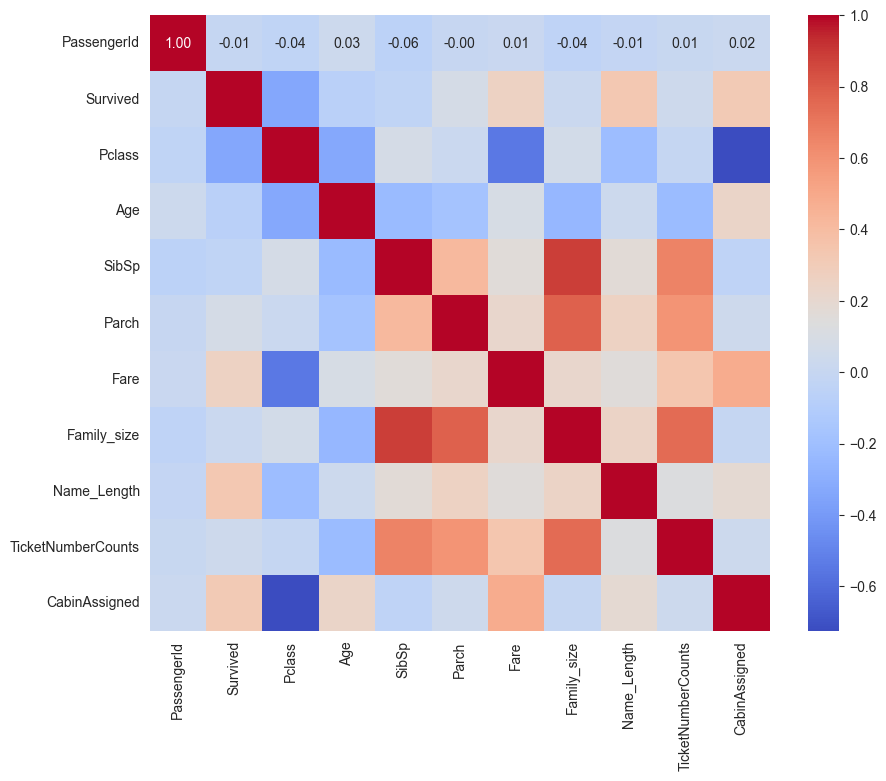

In [219]:
correlation_matrix = train_df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f")

In [220]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_Cut,Fare_Cut,Title,Title_Cut,Name_Length,Name_Lengthgb,Ticket_Number,TicketNumberCounts,TicketShare,CabinAssigned
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,20s,Vary_Low,Mr,Honorific,23,Medium,21171,1,Not Share,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,30s,Very_High,Mrs,Honorific,51,Long,17599,1,Not Share,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,20s,Low,Miss,Honorific,22,Short,3101282,1,Not Share,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,30s,Very_High,Mrs,Honorific,44,Long,113803,2,Share,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,30s,Low,Mr,Honorific,24,Medium,373450,1,Not Share,0


In [221]:
X = train_df.drop(['Survived'], axis=1)
y = train_df['Survived']
X_test = test_df

In [222]:
X_train, X_val, y_train, y_val = train_test_split(X, y,stratify=y, test_size=0.2, random_state=42)

In [223]:
cat_pipeline = Pipeline(steps=[
    ('imputer',SI),
    ('encoder',OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])
cat_2_pipelina = Pipeline(steps=[
    ('imputer',SI),
    ('encoder',OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])
num_pipeline = Pipeline(steps=[
    ('imputer',SI),
    ('scaler',StandardScaler())
])

In [224]:
col_trans = ColumnTransformer(transformers=[
    ('impute', SI, ['Age']),
    ('ord_pipeline', cat_pipeline, ode_cols),
    ('ohe_pipeline', cat_2_pipelina, ohe_cols),
    # ('passthrough', 'passthrough', ['Pclass', 'TicketNumberCounts', 'Cabin_Assigned', 'Name_Size', 'Age', 'Fare'])
    ('passthrough', 'passthrough', ['Pclass', 'CabinAssigned', 'Age', 'Fare', 'TicketNumberCounts'])
],
    remainder='drop',
    n_jobs=-1)
    

In [225]:
rfc = RandomForestClassifier()

In [226]:
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [227]:
cv_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5), n_jobs=-1, verbose=2)

In [228]:
pipefinalrfc = make_pipeline(col_trans, cv_rfc)
pipefinalrfc.fit(X_train, y_train)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_size_grouped',
                                                   'Name_Lengthgb',
                                                   'Title_...
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=RandomForestClassifier(), n_jobs=-1,
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [5, 10, 15, 20],
                                          'max_features': ['auto', 'sqrt',
                                                           'log2'],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [2, 5, 10],
                                          'n_estimators': [100, 200, 300, 400]},
                              verbose=2))])

In [229]:
print(f'Best parameters: {cv_rfc.best_params_}')
print(f'Best score: {cv_rfc.best_score_}')

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best score: 0.8343445287107258


In [230]:
y_pred = pipefinalrfc.predict(X_val)


In [231]:
print(f'Accuracy: {accuracy_score(y_val, y_pred)}')

Accuracy: 0.7821229050279329


In [232]:
submission = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': pipefinalrfc.predict(X_test)})
submission.to_csv('submission.csv', index=False)

In [233]:
dtc = DecisionTreeClassifier()
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2']
}
cv_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5), n_jobs=-1, verbose=2)

In [234]:
pipefinaldtc = make_pipeline(col_trans,cv_dtc)
pipefinaldtc.fit(X_train, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_size_grouped',
                                                   'Name_Lengthgb',
                                                   'Title_...
                                                   'Age', 'Fare',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=DecisionTreeClassifier(), n_jobs=-1,
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [5, 10, 15, 20],
                                          'max_features': ['auto', 'sqrt',
                                                           'log2'],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [2, 5, 10]},
                              verbose=2))])

In [235]:
print(f'Best parameters: {cv_dtc.best_params_}')
print(f'Best score: {cv_dtc.best_score_}')

Best parameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}
Best score: 0.8202698709740963


In [236]:
y_pred = pipefinaldtc.predict(X_val)
print(f'Accuracy: {accuracy_score(y_val, y_pred)}')

Accuracy: 0.7932960893854749


In [237]:
submission = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': pipefinaldtc.predict(X_test)})
submission.to_csv('submission_dtc.csv', index=False)

In [238]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}
cvc_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=StratifiedKFold(n_splits=5), n_jobs=-1, verbose=2)
pipefinalknn = make_pipeline(col_trans,cvc_knn)
pipefinalknn.fit(X_train, y_train)
y_pred = pipefinalknn.predict(X_val)
print(f'Best parameters: {cvc_knn.best_params_}')
print(f'Best score: {cvc_knn.best_score_}')
print(f'Accuracy: {accuracy_score(y_val, y_pred)}')

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best parameters: {'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Best score: 0.7725696838372894
Accuracy: 0.7094972067039106


In [239]:
submission = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': pipefinalknn.predict(X_test)})
submission.to_csv('submission_knn.csv', index=False)

In [243]:
vote = VotingClassifier(estimators=[('rfc', cv_rfc.best_estimator_), ('dtc', cv_dtc.best_estimator_), ('knn', cvc_knn.best_estimator_)], voting='hard',weights=[2,1,1])

In [241]:
type(X_train)

pandas.core.frame.DataFrame

In [244]:
pipefinalvote1 = make_pipeline(col_trans,vote)
pipefinalvote1.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_size_grouped',
                                                   'Name_Lengthgb',
                                                   'Title_...
                                                   'TicketNumberCounts'])])),
                ('votingclassifier',
                 VotingClassifier(estimators=[('rfc',
                                               RandomForestClassifier(criterion='entropy',
                                                                      max_depth=10,
                                                                      min_samples_split=5,
                                                                      n_estimators=300)),
                                              ('dtc',
                                               DecisionTreeClassifier(criterion='entropy',
                                                                      max_depth=20,
                                                                      max_features='sqrt',
                                                                      min_samples_split=10)),
                                              ('knn',
                                               KNeighborsClassifier(algorithm='ball_tree',
                                                                    n_neighbors=3,
                                                                    p=1))],
                                  weights=[2, 1, 1]))])

In [245]:
y_pred = pipefinalvote1.predict(X_val)
print(f'Accuracy: {accuracy_score(y_val, y_pred)}')



Accuracy: 0.776536312849162


In [246]:
submission = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': pipefinalvote1.predict(X_test)})
submission.to_csv('submission_vote1.csv', index=False)